# Set up

In [1]:
%load_ext lab_black
%load_ext autoreload
%autoreload 2

In [2]:
import sys

sys.path.append("../")  # append parent dir to sys.path

In [3]:
import pandas as pd
import joblib
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from windrose import WindroseAxes

In [4]:
from wind_constants import params

In [5]:
plt.rcParams.update(params)
sns.set_style("white")

# Analysis

In [6]:
# PATH_TO_WEATHER = Path("../data/raw/donnees-synop-essentielles-omm.csv")
# data = pd.read_csv(PATH_TO_WEATHER, sep=";")
# df = data[COLUMNS_TO_KEEP]
# joblib.dump(data, "../data/selection/weather.joblib")

In [7]:
COLUMNS_TO_KEEP = [
    "ID OMM station",
    "Date",
    "Pression au niveau mer",
    "Variation de pression en 3 heures",
    "Direction du vent moyen 10 mn",
    "Vitesse du vent moyen 10 mn",
    "Température",
    "Pression station",
    "Niveau barométrique",
    "Variation de pression en 24 heures",
    "Température du thermomètre mouillé",
    "Rafale sur les 10 dernières minutes",
    "Rafales sur une période",
    "Periode de mesure de la rafale",
    "Altitude",
    "region (name)",
    "region (code)",
    "mois_de_l_annee",
]

In [8]:
data = joblib.load("../data/selection/weather.joblib")

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800951 entries, 0 to 1800950
Data columns (total 18 columns):
 #   Column                               Dtype  
---  ------                               -----  
 0   ID OMM station                       int64  
 1   Date                                 object 
 2   Pression au niveau mer               float64
 3   Variation de pression en 3 heures    float64
 4   Direction du vent moyen 10 mn        float64
 5   Vitesse du vent moyen 10 mn          float64
 6   Température                          float64
 7   Pression station                     float64
 8   Niveau barométrique                  float64
 9   Variation de pression en 24 heures   float64
 10  Température du thermomètre mouillé   float64
 11  Rafale sur les 10 dernières minutes  float64
 12  Rafales sur une période              float64
 13  Periode de mesure de la rafale       float64
 14  Altitude                             int64  
 15  region (name)                   

In [10]:
ws = "Vitesse du vent moyen 10 mn"
wd = "Direction du vent moyen 10 mn"

In [11]:
df = data[["Vitesse du vent moyen 10 mn", "Direction du vent moyen 10 mn"]]

In [12]:
df = df[df > 0].dropna()

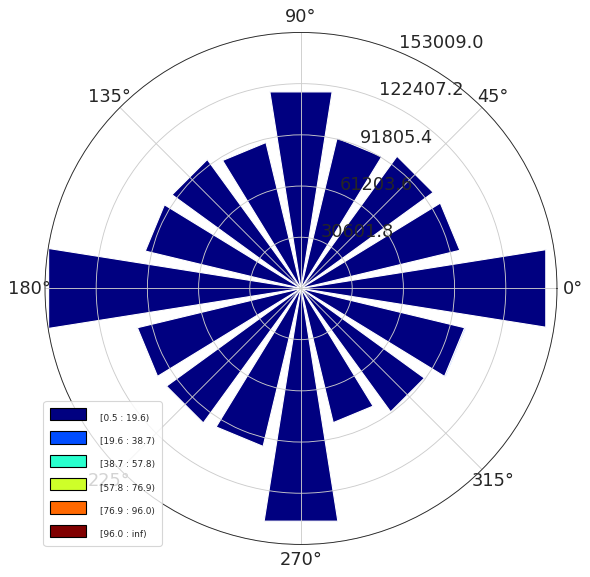

In [13]:
ax = WindroseAxes.from_ax()
ax.bar(df[wd], df[ws])
ax.set_legend()

Text(0.5, 1.0, 'Wind Speed Global Distribution')

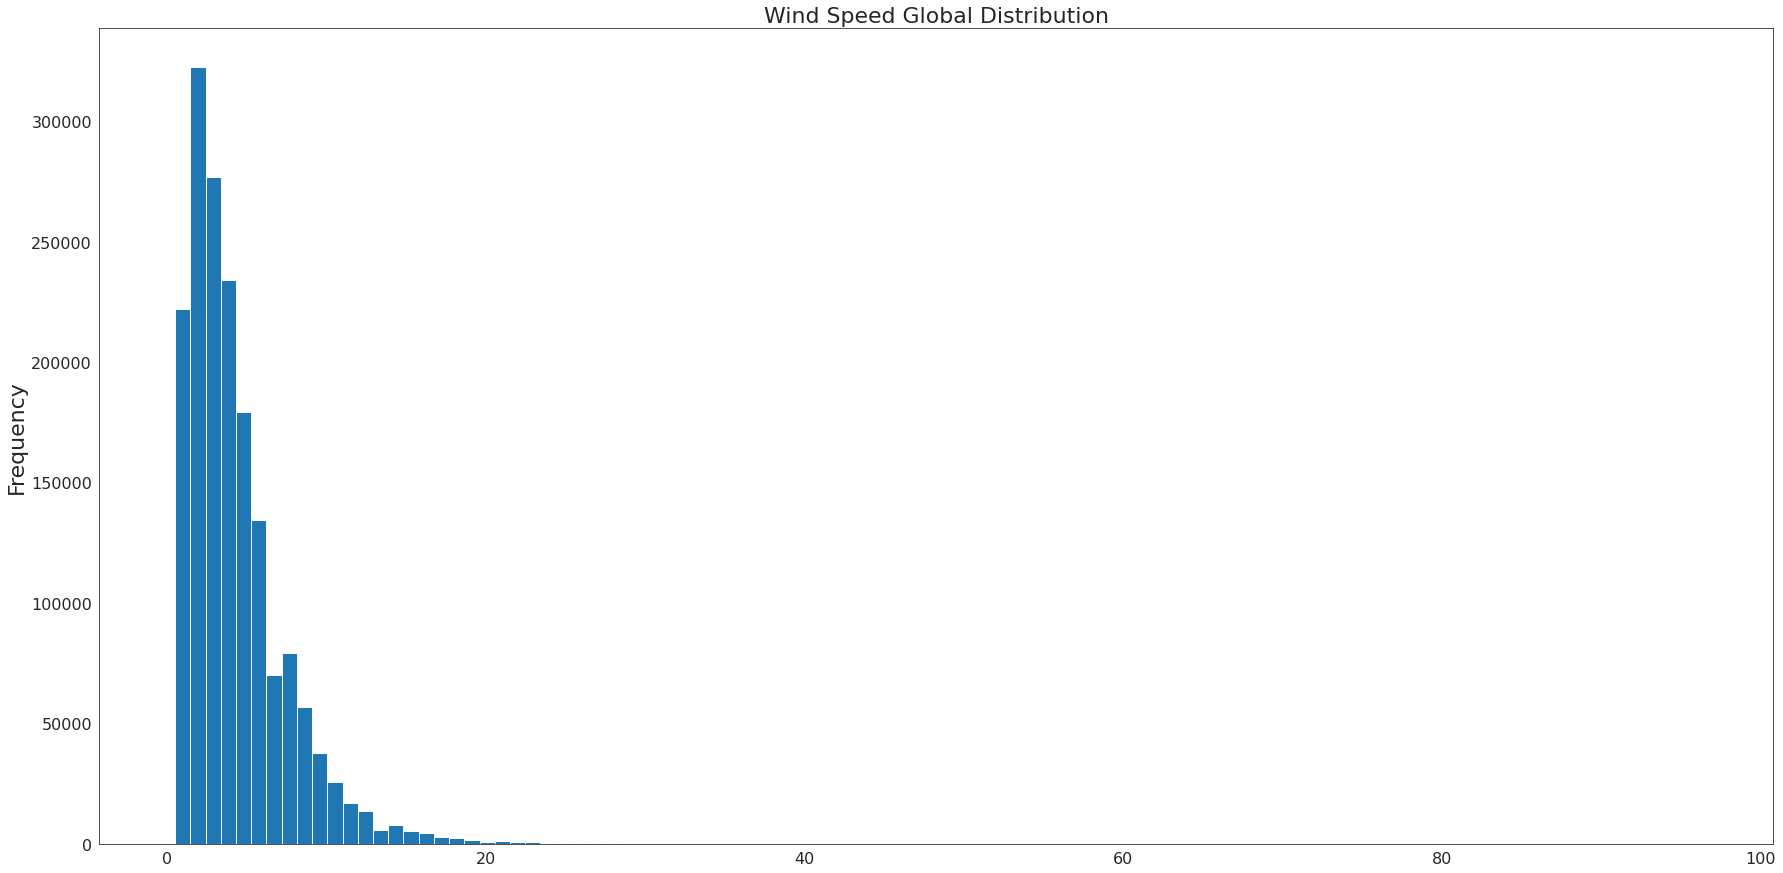

In [14]:
df[ws].plot(kind="hist", bins=100)
plt.title("Wind Speed Global Distribution")

Text(0.5, 1.0, 'Wind Direction Global Distribution')

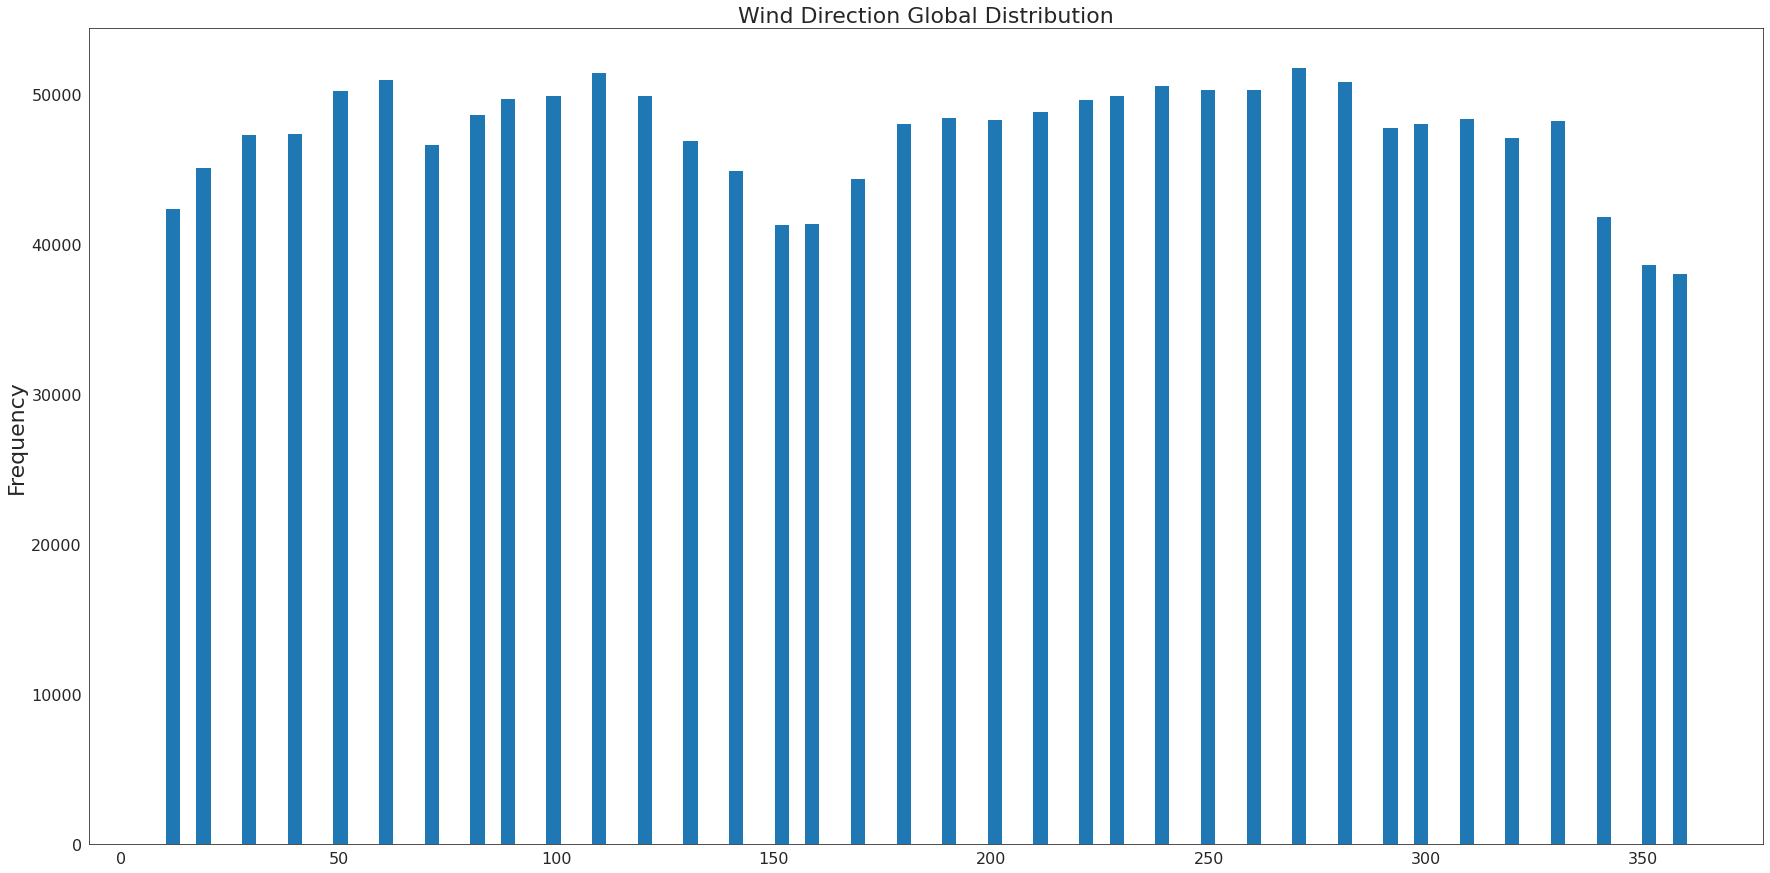

In [15]:
df[wd].plot(kind="hist", bins=100)
plt.title("Wind Direction Global Distribution")